In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import MaxPool1D, Conv1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
# Import the data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Balancing the Dataset

In [3]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

normal.shape, fraud.shape

((284315, 31), (492, 31))

In [4]:
# Select 492 random samples from normal class
normal = normal.sample(fraud.shape[0])
# Verify the new shape
normal.shape, fraud.shape

((492, 31), (492, 31))

In [5]:
data = fraud.append(normal, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,134044.0,-1.354048,0.339861,-0.570930,-0.936190,2.370655,-0.858384,1.927615,-0.338746,-1.135930,...,0.145871,0.042687,-0.299835,0.020198,1.480338,0.756183,-0.160115,0.063884,149.50,0
980,52888.0,1.236794,-0.825174,0.476581,-0.834333,-0.939703,0.170622,-0.955415,0.369560,-0.652912,...,-0.006548,-0.267189,0.195358,-0.380679,-0.037680,-0.431365,0.020089,0.003570,27.86,0
981,53264.0,-4.774625,-5.318562,-0.712200,-1.013491,5.134013,1.264747,-0.757587,0.735654,-1.455463,...,-0.719004,-0.463939,4.073477,0.909751,1.309371,0.510655,0.550101,-0.388102,82.56,0
982,142955.0,1.909244,-1.575891,-0.071912,-0.981727,-0.659813,2.370588,-1.979860,0.821211,0.699476,...,0.275409,1.090120,0.273163,-0.687214,-0.536530,-0.120561,0.102119,-0.050088,32.99,0


In [6]:
x = data.drop('Class', axis=1)
y = data['Class']

In [9]:
# Split the data - 60 % train
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.4, random_state=0, stratify=y)

# Create 20 % for validation and 20 % for testing the model
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0, stratify = y_temp)

In [10]:
x_train.shape, x_test.shape, x_val.shape

((590, 30), (197, 30), (197, 30))

In [14]:
# Scale all the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [15]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

In [43]:
# Reshape the x
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [18]:
x_train.shape, x_val.shape

((590, 30, 1), (197, 30, 1))

## Build the CNN

In [37]:
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape=(x_train[0].shape)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_8 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1792)             

In [39]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics = ['accuracy'])

In [40]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=1)

Train on 590 samples, validate on 197 samples
Epoch 1/20
590/590 [==============================] - 2s 4ms/sample - loss: 0.9499 - accuracy: 0.6305 - val_loss: 0.6326 - val_accuracy: 0.8173
Epoch 2/20
590/590 [==============================] - 0s 459us/sample - loss: 0.6439 - accuracy: 0.7712 - val_loss: 0.5883 - val_accuracy: 0.8173
Epoch 3/20
590/590 [==============================] - 0s 464us/sample - loss: 0.4600 - accuracy: 0.8492 - val_loss: 0.5597 - val_accuracy: 0.8629
Epoch 4/20
590/590 [==============================] - 0s 492us/sample - loss: 0.4524 - accuracy: 0.8475 - val_loss: 0.5349 - val_accuracy: 0.8883
Epoch 5/20
590/590 [==============================] - 0s 490us/sample - loss: 0.3888 - accuracy: 0.8746 - val_loss: 0.5153 - val_accuracy: 0.9086
Epoch 6/20
590/590 [==============================] - 0s 463us/sample - loss: 0.3363 - accuracy: 0.8831 - val_loss: 0.4885 - val_accuracy: 0.9239
Epoch 7/20
590/590 [==============================] - 0s 472us/sample - loss: 0.

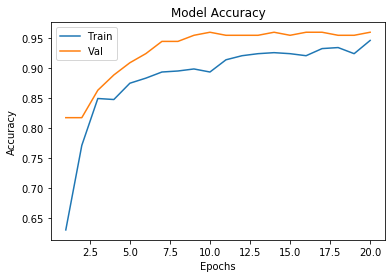

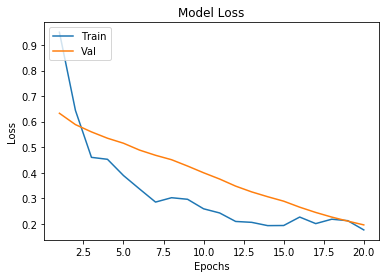

In [41]:
# Plot the training curves
epoch_range = range(1,21)
# Model Accuracy
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# Model Loss
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

 ##  Testing the model

In [49]:
y_pred = model.predict_classes(x_test)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[91,  8],
       [13, 85]], dtype=int64)

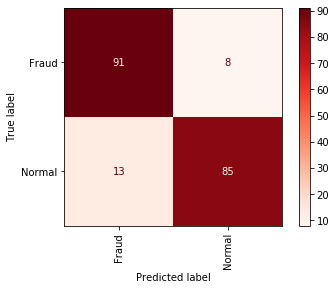

In [62]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Fraud', 'Normal'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=['Fraud', 'Normal'],
                 cmap=plt.cm.Reds, xticks_rotation=90)

plt.show()

In [51]:
# Verify the accuracy
accuracy_score(y_test, y_pred)

0.8934010152284264